<a href="https://colab.research.google.com/github/karthickthangadurai/Chennai-House-Price-Prediction/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install plotly_express

import plotly.express as px


# **Loading Dataset**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/karthickthangadurai/Chennai-House-Price-Prediction/main/train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# **Checking REG_FEE and COMMIS column values**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


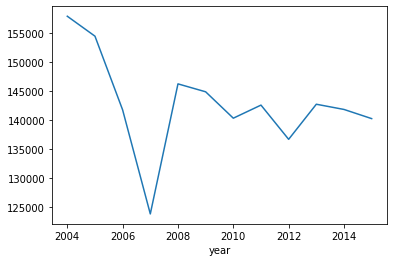

In [5]:
commis = df[["DATE_SALE","COMMIS"]]

commis["year"] = df.DATE_SALE.astype("datetime64").dt.year
commis.groupby("year").COMMIS.mean().plot()

****
**REG_FEE changes frequently and most values are unique**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


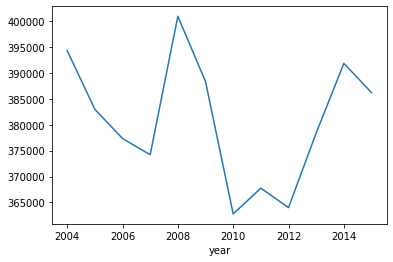

In [6]:
commis = df[["DATE_SALE","COMMIS","REG_FEE",'AREA',"SALES_PRICE"]]

commis["year"] = df.DATE_SALE.astype("datetime64").dt.year
commis.groupby("year").REG_FEE.mean().plot()

****
**COMMIS changes frequently and most values are unique**

In [7]:
# com = house.groupby(['AREA',"year"]).COMMIS.mean()
com = commis.groupby(['AREA',"year"]).SALES_PRICE.mean()
frame = com.to_frame().reset_index()
# frame.unstack(level="year")
frame.head()

,AREA,year,SALES_PRICE
0,Adyar,2006,8.736957e+06
1,Adyar,2007,9.197362e+06
2,Adyar,2008,8.904410e+06
3,Adyar,2009,9.522208e+06
4,Adyar,2010,8.908762e+06


In [8]:
plt.figure(figsize=(15,12))
fig = px.line(frame,x="year",y='SALES_PRICE',color="AREA")
fig.show()

<Figure size 1080x864 with 0 Axes>

# **Dropping unwanted column REG_FEE and COMMIS**

In [9]:
house=df.drop(['PRT_ID','REG_FEE',"COMMIS"],axis=1)

In [10]:
house["year"] = df.DATE_SALE.astype("datetime64").dt.year

In [11]:
house.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
year              0
dtype: int64

# **Filling Null Values**

In [12]:
print("unique values in N_BEDROOM",house.N_BEDROOM.unique())
print("unique values in N_BATHROOM",house.N_BATHROOM.unique())

house['N_BEDROOM'] = np.where(house['N_BEDROOM'].isnull(), house.N_BEDROOM.mode(), house['N_BEDROOM'])
house['N_BATHROOM'] = np.where(house['N_BATHROOM'].isnull(), house.N_BATHROOM.mode(), house['N_BATHROOM'])
house['QS_OVERALL'] = np.where(house['QS_OVERALL'].isnull(), house.QS_OVERALL.mean(), house['QS_OVERALL'])
# house['N_BEDROOM'].fillna(house.N_BEDROOM.mode(),inplace=True)

unique values in N_BEDROOM [ 1.  2.  3.  4. nan]
unique values in N_BATHROOM [ 1.  2. nan]


**N_BEDROOM and N_BATHROOM are categorical features so filling with mode(). And QS_OVERALL is a continious feature so filling with mean()**

In [13]:
house.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
year             0
dtype: int64

# **Data Cleaning**

**Checking datatypes** 

In [14]:
house.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
year               int64
dtype: object

**Changing to Required Datatypes**

In [15]:
house.DATE_SALE = house.DATE_SALE.astype('datetime64')
house.N_BEDROOM = house.N_BEDROOM.astype('int')
house.N_BATHROOM = house.N_BATHROOM.astype('int')
house.DATE_BUILD = house.DATE_BUILD.astype('datetime64')

**Finding age of the building using DATE_SALE and DATE_BUILD and dropping DATE_SALE and DATE_BUILD**

In [16]:
house["AGE"] = pd.DatetimeIndex(house.DATE_SALE).year - pd.DatetimeIndex(house.DATE_BUILD).year
house = house.drop(["DATE_SALE","DATE_BUILD"],axis=1)

In [17]:
house.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
year               int64
AGE                int64
dtype: object

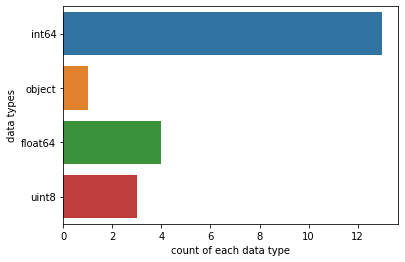

In [59]:
sns.countplot(y=house.dtypes ,data=house)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



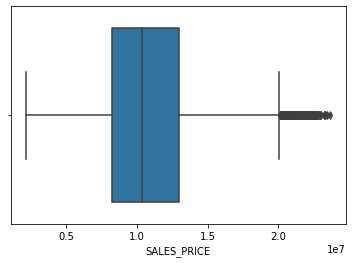

In [18]:
sns.boxplot(house["SALES_PRICE"])

# **Cleaning All Spelling Mistakes in All Categorical Columns**

**Unique values in all categorical column**

In [19]:
for i in ('AREA','SALE_COND','PARK_FACIL','BUILDTYPE',"UTILITY_AVAIL",'STREET'):
  house[i]=house[i].str.strip()
print("List of Unique Values In AREA Column\n\n",house.AREA.unique())
print("-----------------------------------------------------------------------------")
print("List of Unique Values In SALE_COND Column\n\n",house.SALE_COND.unique())
print("-----------------------------------------------------------------------------")
print("List of Unique Values In PARK_FACIL Column\n\n",house.PARK_FACIL.unique())
print("-----------------------------------------------------------------------------")
print("List of Unique Values In BUILDTYPE Column\n\n",house.BUILDTYPE.unique())
print("-----------------------------------------------------------------------------")
print("List of Unique Values In UTILITY_AVAIL Column\n\n",house.UTILITY_AVAIL.unique())
print("-----------------------------------------------------------------------------")
print("List of Unique Values In STREET Column\n\n",house.STREET.unique())
print("-----------------------------------------------------------------------------")
print("List of Unique Values In MZZONE Column\n\n",house.MZZONE.unique())

List of Unique Values In AREA Column

 ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
-----------------------------------------------------------------------------
List of Unique Values In SALE_COND Column

 ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
-----------------------------------------------------------------------------
List of Unique Values In PARK_FACIL Column

 ['Yes' 'No' 'Noo']
-----------------------------------------------------------------------------
List of Unique Values In BUILDTYPE Column

 ['Commercial' 'Others' 'Other' 'House' 'Comercial']
-----------------------------------------------------------------------------
List of Unique Values In UTILITY_AVAIL Column

 ['AllPub' 'ELO' 'NoSewr' 'NoSeWa' 'All Pub']
----------------------------------------------------------------

**Removing all spelling mistakes**

In [20]:
house.AREA = house.AREA.replace(['Ana Nagar','Ann Nagar'],'Anna Nagar')
house.AREA = house.AREA.replace(['Chrompt','Chrmpet','Chormpet'],"Chrompet")
house.AREA = house.AREA.replace(['KKNagar'],'KK Nagar')
house.AREA = house.AREA.replace(['Adyr'],'Adyar')
house.AREA = house.AREA.replace(['Karapakam'],'Karapakkam')
house.AREA = house.AREA.replace(['Velchery'],'Velachery')
house.AREA = house.AREA.replace(['TNagar'],'T Nagar')

house.SALE_COND = house.SALE_COND.replace(['Ab Normal'],'AbNormal')
house.SALE_COND = house.SALE_COND.replace(['Adj Land'],'AdjLand')
house.SALE_COND = house.SALE_COND.replace(['Partiall','PartiaLl'],'Partial')

house.PARK_FACIL = house.PARK_FACIL.replace(['Noo'],"No")

house.BUILDTYPE = house.BUILDTYPE.replace(['Comercial'],'Commercial')
house.BUILDTYPE = house.BUILDTYPE.replace(['Other'],'Others')

house.UTILITY_AVAIL= house.UTILITY_AVAIL.replace(['NoSeWa'],'NoSewr')
house.UTILITY_AVAIL= house.UTILITY_AVAIL.replace(['All Pub'],'AllPub')

house.STREET= house.STREET.replace(['Pavd'],'Paved')
house.STREET= house.STREET.replace(['No Access'],'NoAccess')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

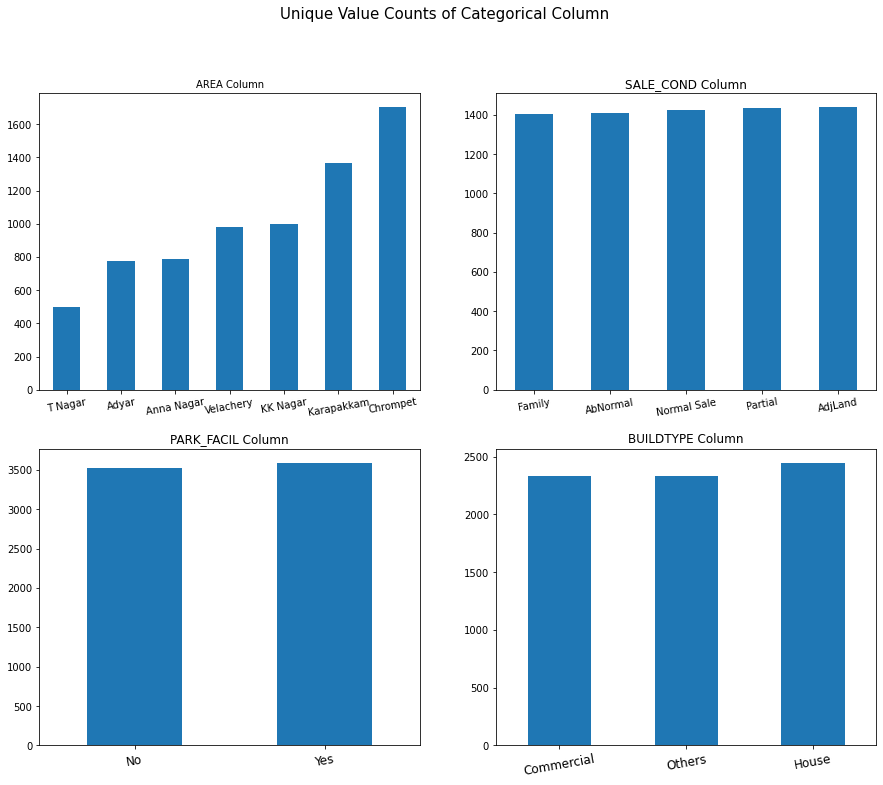

In [21]:
plt.figure(figsize=(15,12))
plt.suptitle("Unique Value Counts of Categorical Column",fontsize=15)

plt.subplot(2,2,1)
house.AREA.value_counts().sort_values().plot(kind='bar')
plt.title("AREA Column",fontsize=10)
plt.xticks(rotation=10,fontsize=10)

plt.subplot(2,2,2)
house.SALE_COND.value_counts().sort_values().plot(kind='bar',)
plt.xticks(rotation=10,fontsize=10)
plt.title("SALE_COND Column",fontsize=12)

plt.subplot(2,2,3)
house.PARK_FACIL.value_counts().sort_values().plot(kind='bar')
plt.title("PARK_FACIL Column",fontsize=12)
plt.xticks(rotation=10,fontsize=12)

plt.subplot(2,2,4)
house.BUILDTYPE.value_counts().sort_values().plot(kind='bar')
plt.title("BUILDTYPE Column",fontsize=12)
plt.xticks(rotation=10,fontsize=12)


**Insights**
 
1. Chrompet and karapakkam has more number of houses

2. Sale Condition has equally distributed data points

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

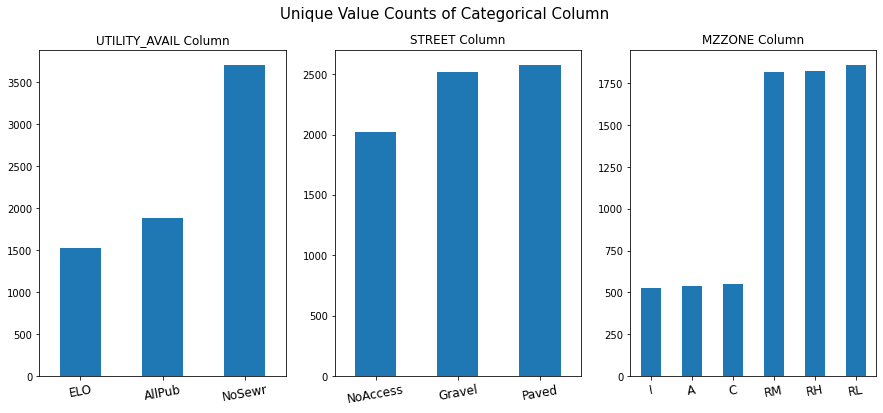

In [22]:
plt.figure(figsize=(15,6))
plt.suptitle("Unique Value Counts of Categorical Column",fontsize=15)

plt.subplot(1,3,1)
house.UTILITY_AVAIL.value_counts().sort_values().plot(kind='bar')
plt.title("UTILITY_AVAIL Column",fontsize=12)
plt.xticks(rotation=10,fontsize=12)

plt.subplot(1,3,2)
house.STREET.value_counts().sort_values().plot(kind='bar')
plt.title("STREET Column",fontsize=12)
plt.xticks(rotation=10,fontsize=12)

plt.subplot(1,3,3)
house.MZZONE.value_counts().sort_values().plot(kind='bar')
plt.title("MZZONE Column",fontsize=12)
plt.xticks(rotation=10,fontsize=12)

**3.NoSewr houses are more**

In [23]:
house.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,year,AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,30


In [24]:
house.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'year', 'AGE'],
      dtype='object')

# **Exploratory Data Analysis**

# **AREA VS SALES_PRICE**

             SALES_PRICE
SALES_PRICE          1.0


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

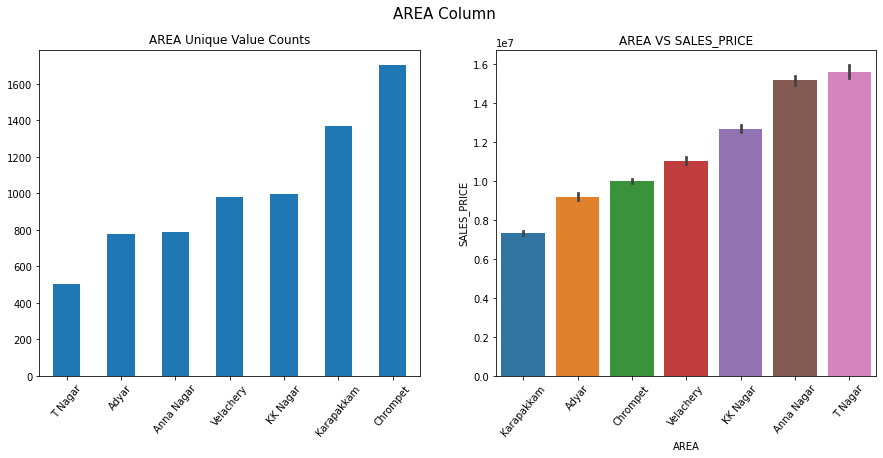

In [25]:
print(house[["AREA","SALES_PRICE"]].corr())

area_order = house.groupby('AREA')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['AREA']

plt.figure(figsize=(15,6))
plt.suptitle("AREA Column",fontsize=15)
plt.subplot(1,2,1)
house.AREA.value_counts().sort_values().plot(kind='bar')
plt.title("AREA Unique Value Counts",fontsize=12)
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x='AREA',y='SALES_PRICE',data=house,order = area_order)
plt.title("AREA VS SALES_PRICE")
plt.xticks(rotation=50)




1. T Nagar and Anna Nagar are having highest selling price compare to Karappakam 
2. AREA has linear relationship to the target
3. It has order so we do label encoding



# **INT_SQFT VS SALES_PRICE**

Correlation
              INT_SQFT  SALES_PRICE
INT_SQFT     1.000000     0.612125
SALES_PRICE  0.612125     1.000000



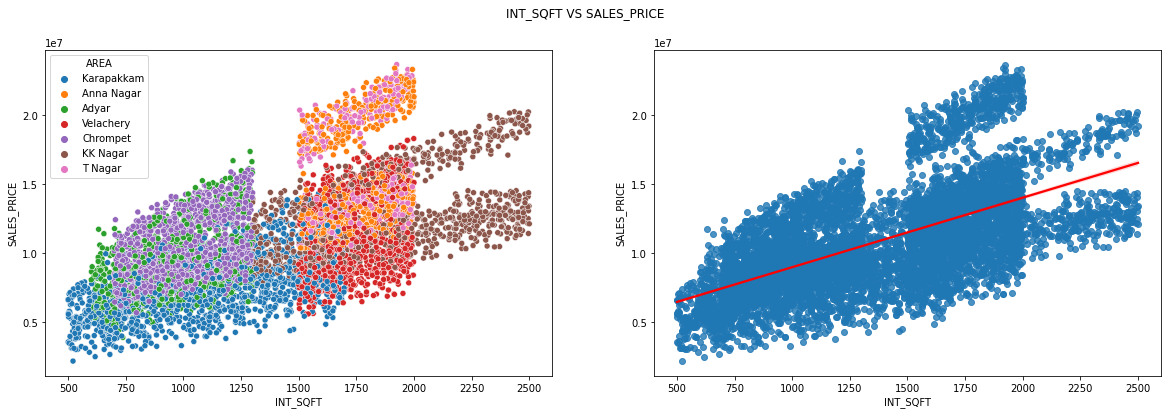

In [26]:
print("Correlation\n",house[["INT_SQFT","SALES_PRICE"]].corr());print()
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',hue="AREA",data=house)
plt.suptitle("INT_SQFT VS SALES_PRICE")
plt.subplot(1,2,2)
ax = sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df, line_kws={'color': 'r'})


1.   We can find that KK Nagar houses are larger
2.   Chrompet and Karapakkam houses are smaller. So these places can be preferred for smallest houses
3. Medium house are in T Nagar and Velachery
4. T Nagar is in higher price even in avg area
5. INT_SQFT are in linear relationship with SALES_PRICE




# **DIST_MAINROAD VS SALES_PRICE**

Correlation
                DIST_MAINROAD  SALES_PRICE
DIST_MAINROAD       1.000000     0.018783
SALES_PRICE         0.018783     1.000000



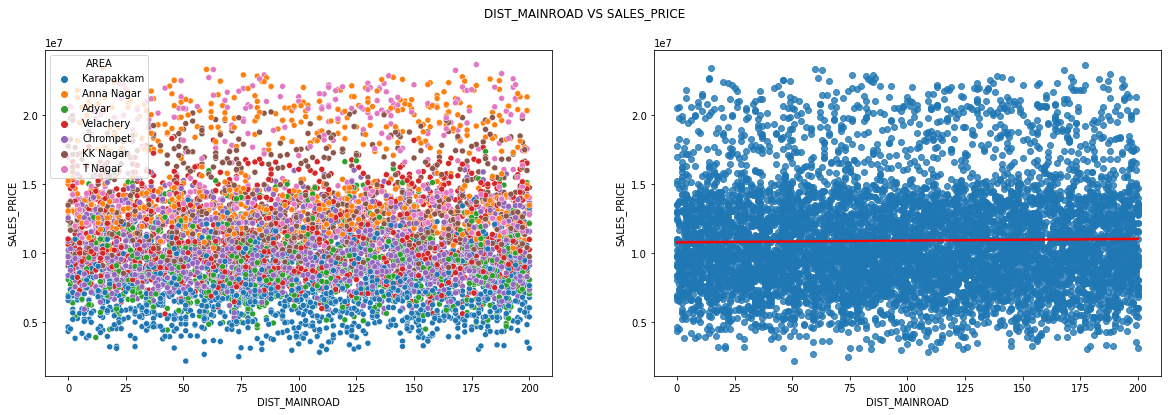

In [27]:
print("Correlation\n",house[["DIST_MAINROAD","SALES_PRICE"]].corr());print()
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE',hue="AREA",data=house)
plt.suptitle("DIST_MAINROAD VS SALES_PRICE")
plt.subplot(1,2,2)
ax = sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df, line_kws={'color': 'r'})

1. There is no linear relationship to SALES_PRCE
2. We drop this column

# **N_BEDROOM VS SALES_PRICE**

Correlation
              N_BEDROOM  SALES_PRICE
N_BEDROOM     1.000000     0.330987
SALES_PRICE   0.330987     1.000000



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

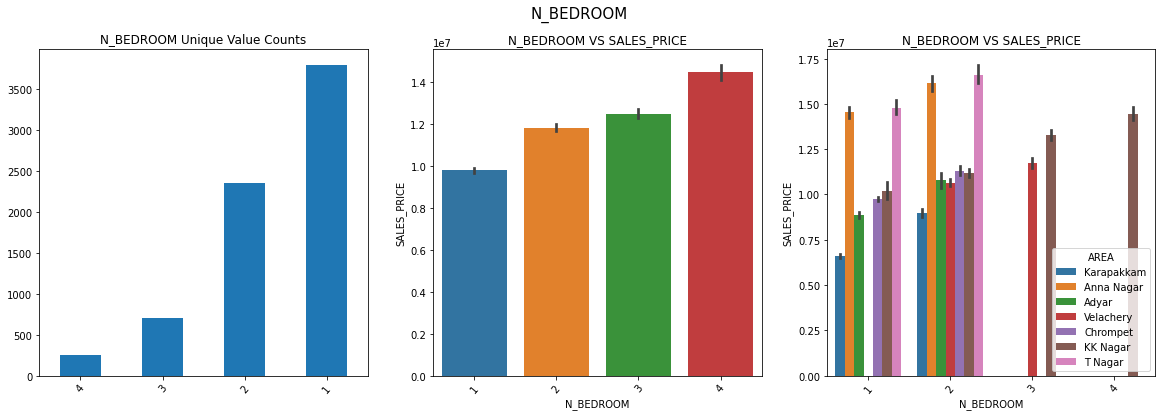

In [28]:
print("Correlation\n",house[["N_BEDROOM","SALES_PRICE"]].corr());print()

plt.figure(figsize=(20,6))
plt.suptitle("N_BEDROOM",fontsize=15)
plt.subplot(1,3,1)
house.N_BEDROOM.value_counts().sort_values().plot(kind='bar')
plt.title("N_BEDROOM Unique Value Counts",fontsize=12)
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,2)
ax = sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=house)
plt.title("N_BEDROOM VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,3)
ax = sns.barplot(x='N_BEDROOM',y='SALES_PRICE',hue="AREA",data=house)
plt.title("N_BEDROOM VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

**Insights**

1.   We can find more One BED_ROOM houses and it has less SALE_PRICE but it is not avilable in Velachery
2.   Four BED_ROOM houses are in high price and which is available only in KK NAgar
3. T Nagar has highest selling price for Double Bedroom
4. BED_ROOM are having linear relationship with SALES_PRICE



# **N_BATHROOM VS SALES_PRICE**

Correlation
              N_BATHROOM  SALES_PRICE
N_BATHROOM     1.000000     0.108834
SALES_PRICE    0.108834     1.000000



(array([0, 1]), <a list of 2 Text major ticklabel objects>)

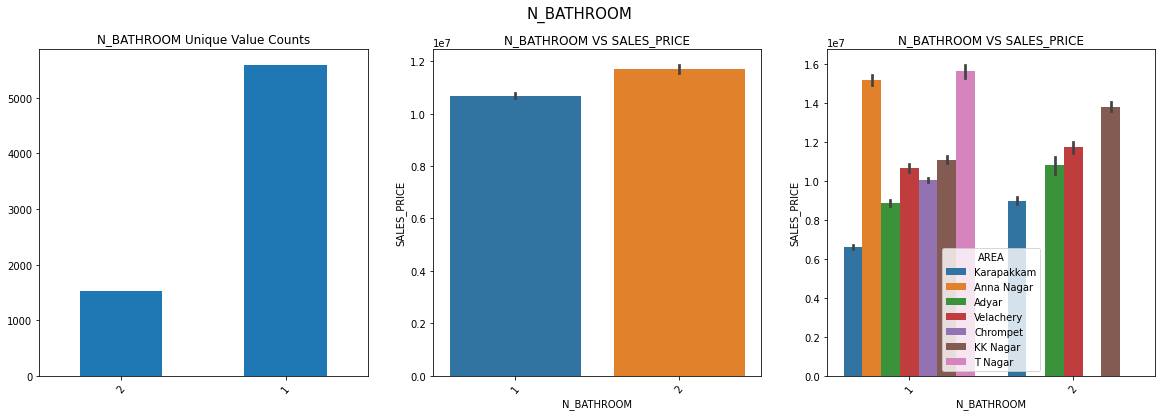

In [29]:
print("Correlation\n",house[["N_BATHROOM","SALES_PRICE"]].corr());print()

plt.figure(figsize=(20,6))
plt.suptitle("N_BATHROOM",fontsize=15)
plt.subplot(1,3,1)
house.N_BATHROOM.value_counts().sort_values().plot(kind='bar')
plt.title("N_BATHROOM Unique Value Counts",fontsize=12)
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,2)
ax = sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=house)
plt.title("N_BATHROOM VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,3)
ax = sns.barplot(x='N_BATHROOM',y='SALES_PRICE',hue="AREA",data=house)
plt.title("N_BATHROOM VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

**Insights**


1.   Double Bathroom is not available in T nagar,Anna Nagr and Chrompet
2. N_BATHROOM is in linear relationship with SALES_PRICE
3. We will label encoding



# **N_ROOM VS SALES_PRICE**

Correlation
               N_ROOM  SALES_PRICE
N_ROOM       1.00000      0.60276
SALES_PRICE  0.60276      1.00000



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

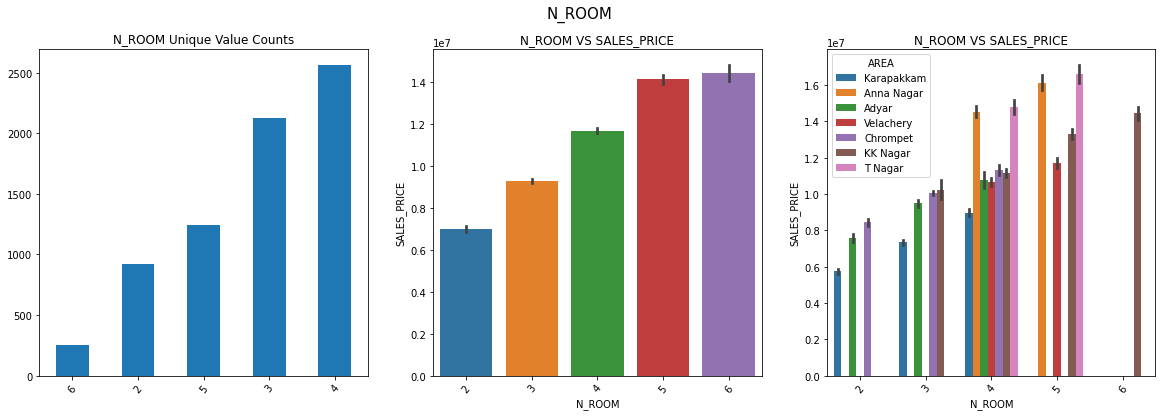

In [30]:
print("Correlation\n",house[["N_ROOM","SALES_PRICE"]].corr());print()

plt.figure(figsize=(20,6))
plt.suptitle("N_ROOM",fontsize=15)
plt.subplot(1,3,1)
house.N_ROOM.value_counts().sort_values().plot(kind='bar')
plt.title("N_ROOM Unique Value Counts",fontsize=12)
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,2)
ax = sns.barplot(x='N_ROOM',y='SALES_PRICE',data=house)
plt.title("N_ROOM VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,3)
ax = sns.barplot(x='N_ROOM',y='SALES_PRICE',hue="AREA",data=house)
plt.title("N_ROOM VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

**Insights**


1.   We easily find that N_ROOM has linear relationship with Target
2.   Six Rooms available only in KK Nagar
3. T Nagar and Anna Nagar are having 4 and 5 rooms which has highest selling price



# **SALE_COND VS SALES_PRICE**

Correlation
              SALES_PRICE
SALES_PRICE          1.0



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

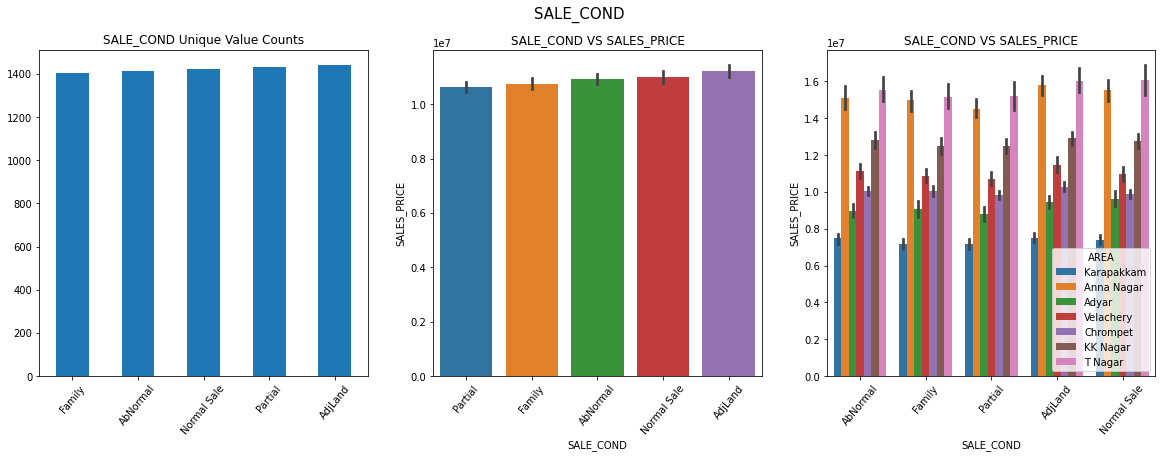

In [31]:
Salecond_order = house.groupby('SALE_COND')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['SALE_COND']


print("Correlation\n",house[["SALE_COND","SALES_PRICE"]].corr());print()

plt.figure(figsize=(20,6))
plt.suptitle("SALE_COND",fontsize=15)
plt.subplot(1,3,1)
house.SALE_COND.value_counts().sort_values().plot(kind='bar')
plt.title("SALE_COND Unique Value Counts",fontsize=12)
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,2)
ax = sns.barplot(x='SALE_COND',y='SALES_PRICE',data=house,order = Salecond_order)
plt.title("SALE_COND VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,3)
ax = sns.barplot(x='SALE_COND',y='SALES_PRICE',hue="AREA",data=house)
plt.title("SALE_COND VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

**Insights**
1. SALE_COND is not in linear relationshiop
2. We drop this column

# **PARK_FACIL VS SALES_PRICE**

Correlation
              SALES_PRICE
SALES_PRICE          1.0



(array([0, 1]), <a list of 2 Text major ticklabel objects>)

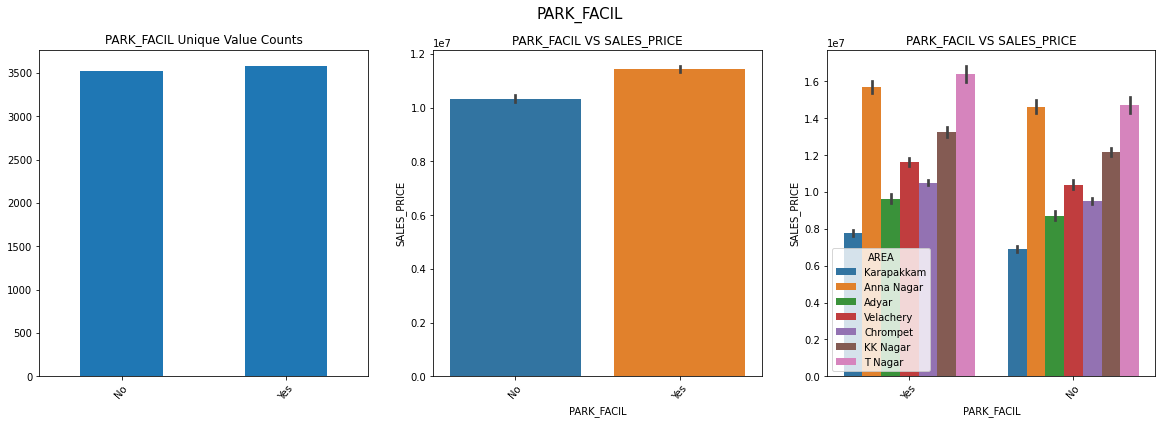

In [32]:
parkfacil_order = house.groupby('PARK_FACIL')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['PARK_FACIL']

print("Correlation\n",house[["PARK_FACIL","SALES_PRICE"]].corr());print()

plt.figure(figsize=(20,6))
plt.suptitle("PARK_FACIL",fontsize=15)
plt.subplot(1,3,1)
house.PARK_FACIL.value_counts().sort_values().plot(kind='bar')
plt.title("PARK_FACIL Unique Value Counts",fontsize=12)
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,2)
ax = sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=house,order = parkfacil_order)
plt.title("PARK_FACIL VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,3)
ax = sns.barplot(x='PARK_FACIL',y='SALES_PRICE',hue="AREA",data=house)
plt.title("PARK_FACIL VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

**Insights**
1. PARK_FACIl is in linear relationshiop
2. We do label encoding

# **BUILDTYPE VS SALES_PRICE**


Correlation
              SALES_PRICE
SALES_PRICE          1.0



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

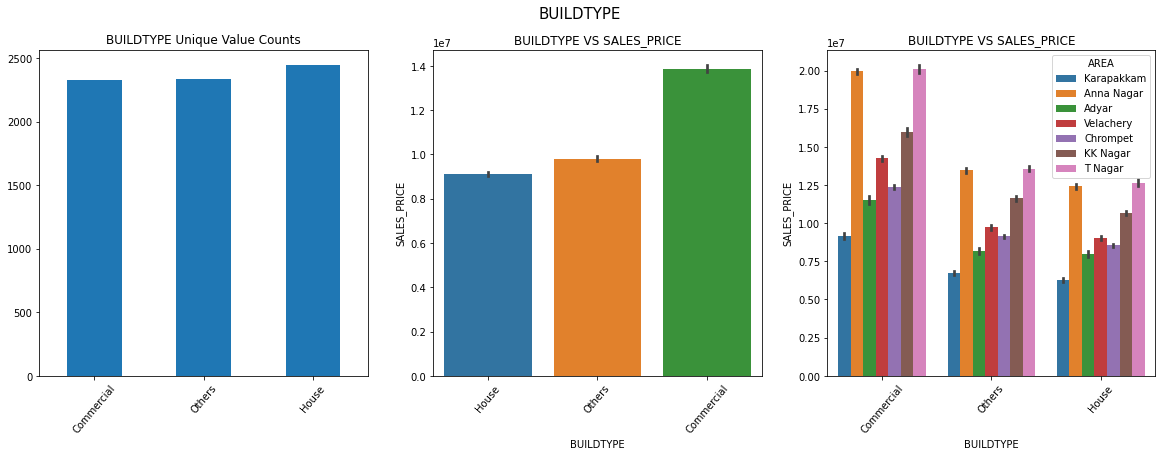

In [33]:
buildtype_order = house.groupby('BUILDTYPE')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['BUILDTYPE']

print("Correlation\n",house[["BUILDTYPE","SALES_PRICE"]].corr());print()

plt.figure(figsize=(20,6))
plt.suptitle("BUILDTYPE",fontsize=15)
plt.subplot(1,3,1)
house.BUILDTYPE.value_counts().sort_values().plot(kind='bar')
plt.title("BUILDTYPE Unique Value Counts",fontsize=12)
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,2)
ax = sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=house,order = buildtype_order)
plt.title("BUILDTYPE VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,3)
ax = sns.barplot(x='BUILDTYPE',y='SALES_PRICE',hue="AREA",data=house)
plt.title("BUILDTYPE VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

**Insights**
1. BUILDTYPE is in linear relationship
2. We do one hot encoding
3. Commercial buildings has highest selling price




In [34]:
#which plece has more commercial buildings?

#**UTILITY_AVAIL VS SALES_PRICE**

Correlation
              SALES_PRICE
SALES_PRICE          1.0



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

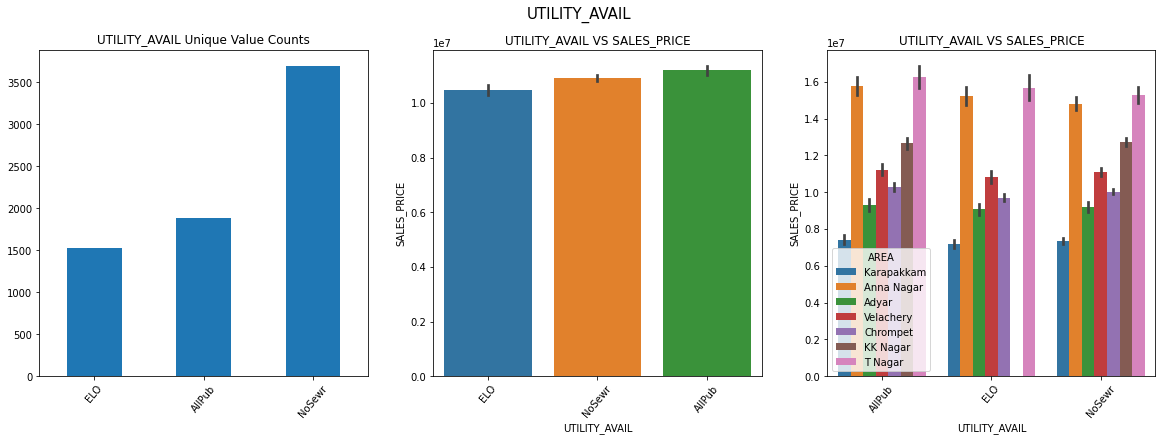

In [35]:
UTILITY_AVAIL_order = house.groupby('UTILITY_AVAIL')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['UTILITY_AVAIL']

print("Correlation\n",house[["UTILITY_AVAIL","SALES_PRICE"]].corr());print()

plt.figure(figsize=(20,6))
plt.suptitle("UTILITY_AVAIL",fontsize=15)
plt.subplot(1,3,1)
house.UTILITY_AVAIL.value_counts().sort_values().plot(kind='bar')
plt.title("UTILITY_AVAIL Unique Value Counts",fontsize=12)
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,2)
ax = sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=house,order = UTILITY_AVAIL_order)
plt.title("UTILITY_AVAIL VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,3)
ax = sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',hue="AREA",data=house)
plt.title("UTILITY_AVAIL VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

**Insights**
1. UTILITY_AVAIL has linear realtionship to SALE_PRICE
2. We do label encoding

# **STREET VS SALES_PRICE**

Correlation
              SALES_PRICE
SALES_PRICE          1.0



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

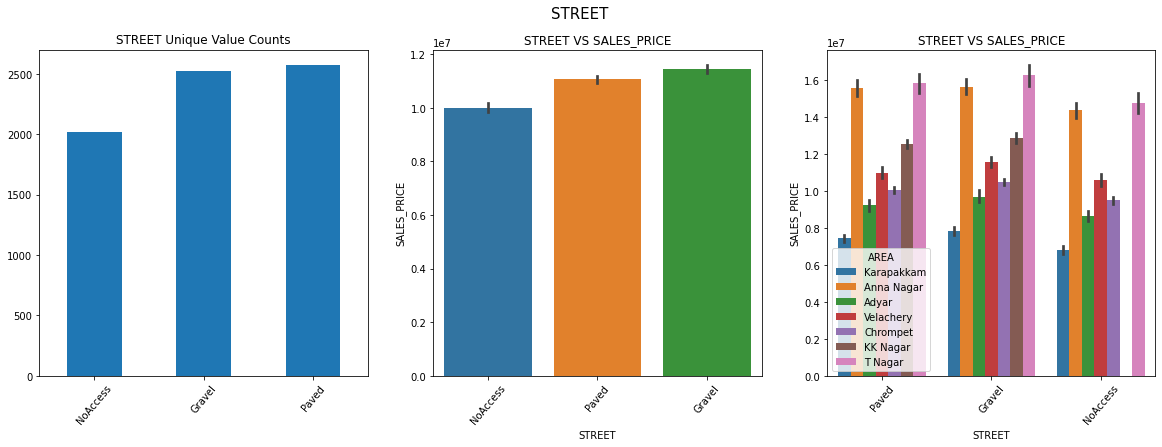

In [36]:
STREET_order = house.groupby('STREET')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['STREET']

print("Correlation\n",house[["STREET","SALES_PRICE"]].corr());print()

plt.figure(figsize=(20,6))
plt.suptitle("STREET",fontsize=15)
plt.subplot(1,3,1)
house.STREET.value_counts().sort_values().plot(kind='bar')
plt.title("STREET Unique Value Counts",fontsize=12)
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,2)
ax = sns.barplot(x='STREET',y='SALES_PRICE',data=house,order = STREET_order)
plt.title("STREET VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,3)
ax = sns.barplot(x='STREET',y='SALES_PRICE',hue="AREA",data=house)
plt.title("STREET VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

**Insights**
1. STREET has linear relationship with target
2. NoAccess house are not available in KK Nagar
3. STREET is in linear relationhip with SALES_PRICE
4. We do label encoding 

# **MZZONE VS SALES_PRICE**

Correlation
              SALES_PRICE
SALES_PRICE          1.0



(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

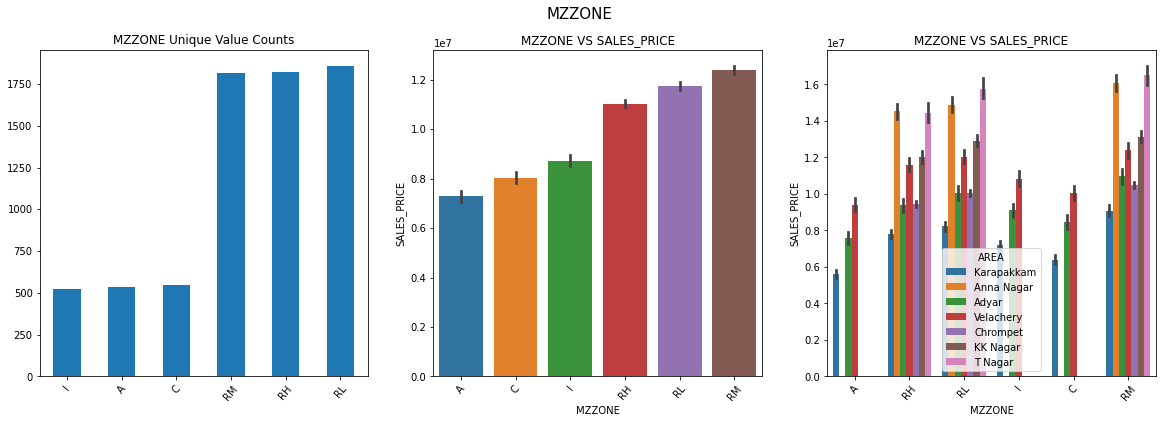

In [37]:
MZZONE_order = house.groupby('MZZONE')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['MZZONE']

print("Correlation\n",house[["MZZONE","SALES_PRICE"]].corr());print()

plt.figure(figsize=(20,6))
plt.suptitle("MZZONE",fontsize=15)
plt.subplot(1,3,1)
house.MZZONE.value_counts().sort_values().plot(kind='bar')
plt.title("MZZONE Unique Value Counts",fontsize=12)
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,2)
ax = sns.barplot(x='MZZONE',y='SALES_PRICE',data=house,order = MZZONE_order)
plt.title("MZZONE VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)

plt.subplot(1,3,3)
ax = sns.barplot(x='MZZONE',y='SALES_PRICE',hue="AREA",data=house)
plt.title("MZZONE VS SALES_PRICE")
plt.xticks(rotation=50,fontsize=10)



**Insights**
1. MZZONE is in relatnship with SALES_PRICE
2. A,C,I are in linear relationship and RH,RL,RM are in linear realationship
3. A,C,I will be encoded as 1,2,3 and RH,RL,RM will be encoded as 5,6,7

# **AGE vs SALES_PRICE**

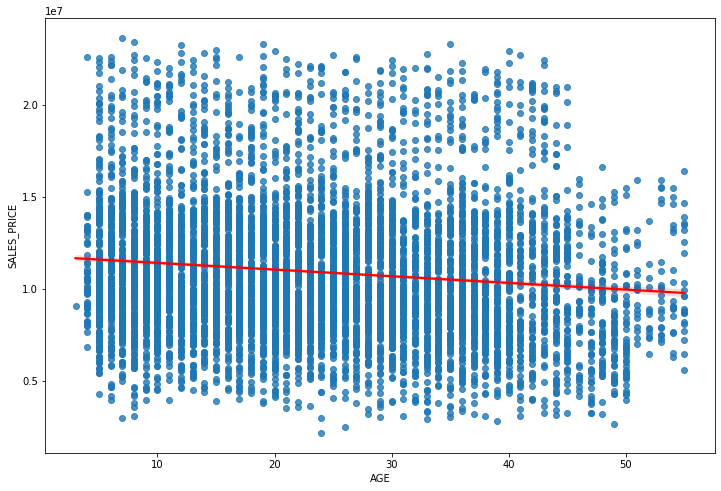

In [38]:
plt.figure(figsize=(12,8))
ax = sns.regplot(x='AGE',y='SALES_PRICE',data=house, line_kws={'color': 'r'})

**Insights**
1.   There is no relationship with data so will be dropping this column



# **QS_ROOMS vs SALES_PRICE**

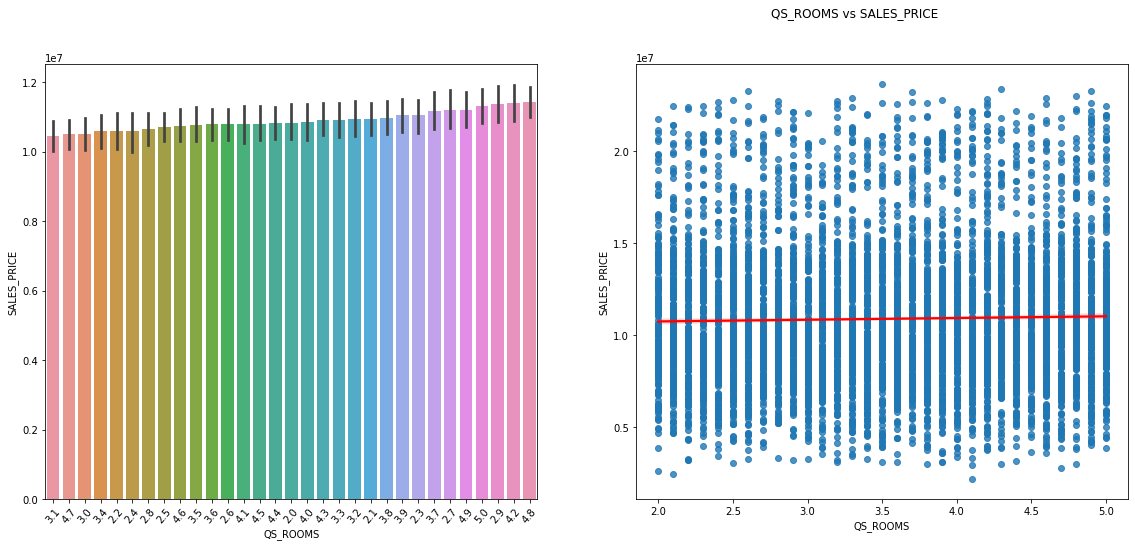

In [39]:
QS_ROOMS_order = house.groupby('QS_ROOMS')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['QS_ROOMS']
plt.figure(figsize=(30,8))
plt.suptitle("QS_ROOMS vs SALES_PRICE")
plt.subplot(1,3,1)
# ax = sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=house, line_kws={'color': 'r'})
ax = sns.barplot(x='QS_ROOMS',y='SALES_PRICE',data=house,order = QS_ROOMS_order)
plt.xticks(rotation=50,fontsize=10)
plt.subplot(1,3,2)
ax = sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=house, line_kws={'color': 'r'})

**Insights**
1. There is no relationship so we drop this column

# **QS_BATHROOM vs SALES_PRICE**

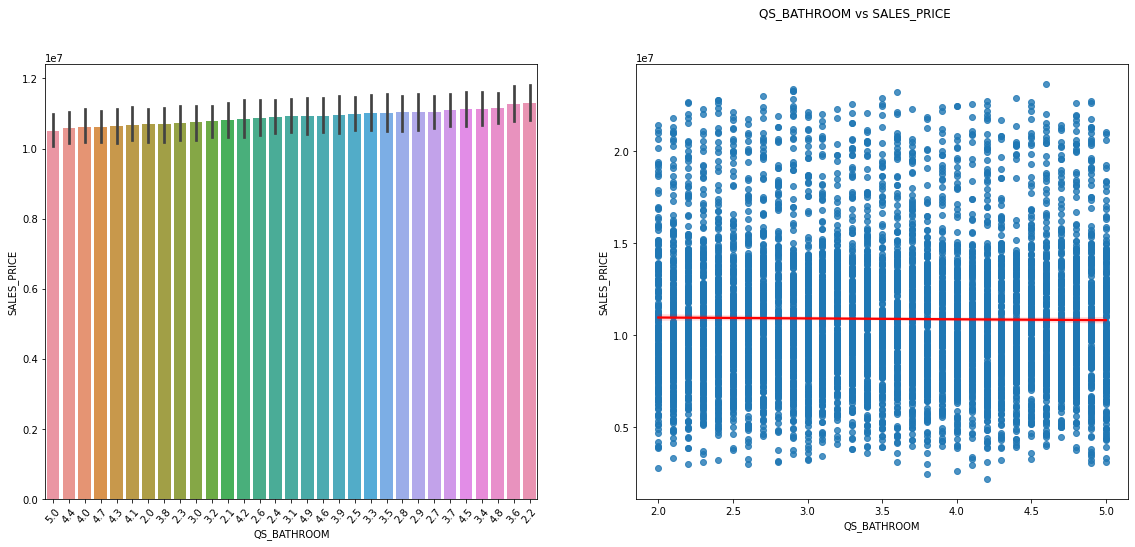

In [40]:
QS_BATHROOM_order = house.groupby('QS_BATHROOM')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['QS_BATHROOM']
plt.figure(figsize=(30,8))
plt.suptitle("QS_BATHROOM vs SALES_PRICE")
plt.subplot(1,3,1)
# ax = sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=house, line_kws={'color': 'r'})
ax = sns.barplot(x='QS_BATHROOM',y='SALES_PRICE',data=house,order = QS_BATHROOM_order)
plt.xticks(rotation=50,fontsize=10)
plt.subplot(1,3,2)
ax = sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=house, line_kws={'color': 'r'})

**There is no linear relationship we drop this feature**

# **QS_BEDROOM vs SALES_PRICE**

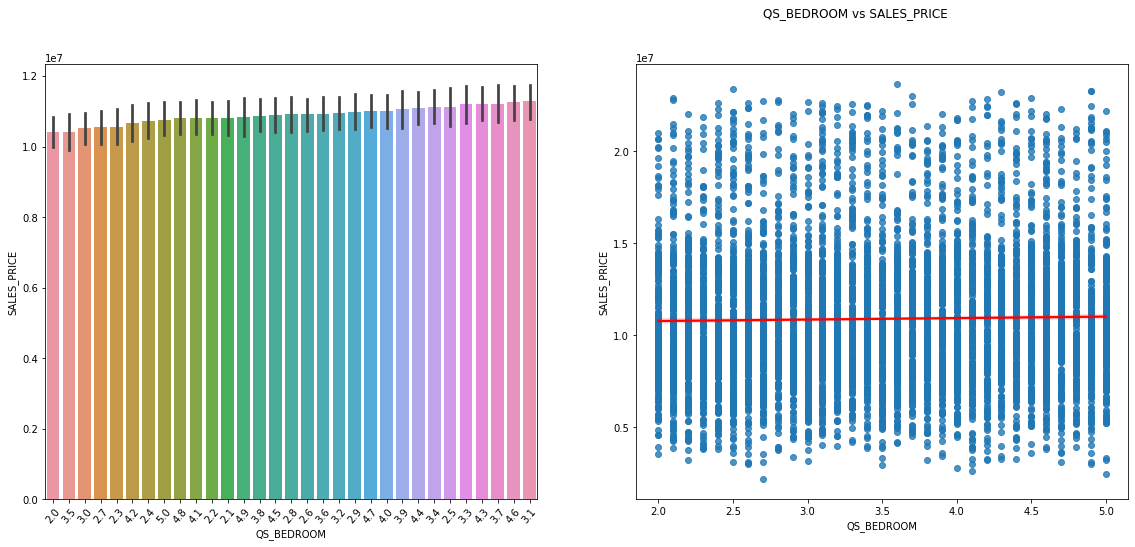

In [41]:
QS_BEDROOM_order = house.groupby('QS_BEDROOM')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['QS_BEDROOM']
plt.figure(figsize=(30,8))
plt.suptitle("QS_BEDROOM vs SALES_PRICE")
plt.subplot(1,3,1)
# ax = sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=house, line_kws={'color': 'r'})
ax = sns.barplot(x='QS_BEDROOM',y='SALES_PRICE',data=house,order = QS_BEDROOM_order)
plt.xticks(rotation=50,fontsize=10)
plt.subplot(1,3,2)
ax = sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=house, line_kws={'color': 'r'})

**There is no linear relationship with data so we drop this column**

# **QS_OVERALL vs SALES_PRICE**

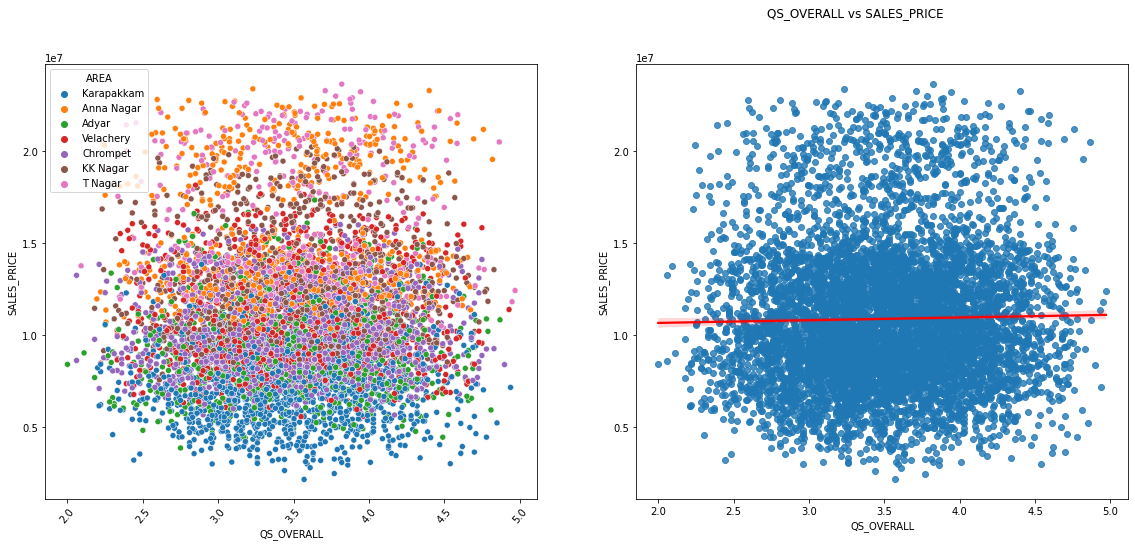

In [45]:
QS_OVERALL_order = house.groupby('QS_OVERALL')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")['QS_OVERALL']
plt.figure(figsize=(30,8))
plt.suptitle("QS_OVERALL vs SALES_PRICE")
plt.subplot(1,3,1)
# ax = sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=house, line_kws={'color': 'r'})
ax = sns.scatterplot(x='QS_OVERALL',y='SALES_PRICE',data=house,hue='AREA')
plt.xticks(rotation=50,fontsize=10)
plt.subplot(1,3,2)
ax = sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=house, line_kws={'color': 'r'})

**There is no linear relationship so we drop this column**

In [46]:
# radar = house.groupby('MZZONE')["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")
# import plotly.express as px
# import pandas as pd
# radar = house.MZZONE.value_counts().sort_values()
# df = pd.DataFrame(dict(
#     r=radar.to_list(),
#     theta=radar.index))
# fig = px.line_polar(df, r='r', theta='theta', line_close=True)
# fig.show()

# **Encoding**

In [48]:
print("AREA Encoding-----",{'Karapakkam':0, 'Anna Nagar':5, 'Adyar':1, 'Velachery':3, 'Chrompet':2 ,'KK Nagar':4,'T Nagar':6})

house.AREA = house.AREA.map({'Karapakkam':0, 'Anna Nagar':5, 'Adyar':1, 'Velachery':3, 'Chrompet':2 ,'KK Nagar':4,'T Nagar':6})

# print("SALE_COND Encoding-----",{'abnormal':1, 'family':2, 'partial':3, 'adjland':4, 'normal sale':4})
# house.SALE_COND = house.SALE_COND.map({'abnormal':1, 'family':2, 'partial':3, 'adjland':4, 'normal sale':4})

print("PARK_FACIL Encoding----",{'Yes':1, 'No':0})
house.PARK_FACIL = house.PARK_FACIL.map({'Yes':1,'No':0})

house = pd.get_dummies(house,columns=["BUILDTYPE"])
# print("BUILDTYPE Encoding----",{'Commercial':2, 'Others':1, 'House':0})
# house.BUILDTYPE = house.BUILDTYPE.map({'Commercial':2, 'Others':1, 'House':0})

print("UTILITY_AVAIL Encoding",{'AllPub':2, 'ELO':0, 'NoSewr':1})
house.UTILITY_AVAIL = house.UTILITY_AVAIL.map({'AllPub':2, 'ELO':0, 'NoSewr':1})

print("STREET Encoding----",{'Paved':1, 'Gravel':2, 'NoAccess':0})
house.STREET = house.STREET.map({'Paved':1, 'Gravel':2, 'NoAccess':0})

print("MZZONE Encoding----",{'A':1,'C':2,'I':3,'RH':5,'RL':6,"RM":7})
house.MZZONE=house.MZZONE.map({'A':1,'C':2,'I':3,'RH':5,'RL':6,"RM":7})

AREA Encoding----- {'Karapakkam': 0, 'Anna Nagar': 5, 'Adyar': 1, 'Velachery': 3, 'Chrompet': 2, 'KK Nagar': 4, 'T Nagar': 6}
PARK_FACIL Encoding---- {'Yes': 1, 'No': 0}
UTILITY_AVAIL Encoding {'AllPub': 2, 'ELO': 0, 'NoSewr': 1}
STREET Encoding---- {'Paved': 1, 'Gravel': 2, 'NoAccess': 3}
MZZONE Encoding---- {'A': 1, 'C': 2, 'I': 3, 'RH': 5, 'RL': 6, 'RM': 7}


In [49]:
house.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,year,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,131,1,1,3,AbNormal,1,2,1,...,4.0,3.9,4.9,4.330,7600000,2011,44,1,0,0
1,5,1986,26,2,1,5,AbNormal,0,2,2,...,4.9,4.2,2.5,3.765,21717770,2006,11,1,0,0
2,1,909,70,1,1,3,AbNormal,1,0,2,...,4.1,3.8,2.2,3.090,13159200,2012,20,1,0,0
3,3,1855,14,3,2,5,Family,0,1,1,...,4.7,3.9,3.6,4.010,9630290,2010,22,0,0,1
4,0,1226,84,1,1,3,AbNormal,1,2,2,...,3.0,2.5,4.1,3.290,7406250,2009,30,0,0,1


In [50]:
house.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'SALES_PRICE', 'year', 'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

# **Removing unwanted Columns**

In [114]:
X = house[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM','N_ROOM',
           'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE','AGE',
           'BUILDTYPE_Commercial', 'BUILDTYPE_House','BUILDTYPE_Others']].values 

# X = house[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM',
#            'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE','AGE','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
#            'BUILDTYPE']].values 
y = house[['SALES_PRICE']].values

print(f'Shape\nX is {X.shape}\ny is {y.shape}')

Shape
X is (7109, 13)
y is (7109, 1)


# **Splitting the data**

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Shape\nX_train is {X_train.shape}\ny_train is {y_train.shape}\nX_test is {X_test.shape}\ny_test is {y_test.shape}')

Shape
X_train is (4976, 13)
y_train is (4976, 1)
X_test is (2133, 13)
y_test is (2133, 1)


# **Scaling**

In [116]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# **Linear Regression Model**

In [117]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

# **R2 Score**

In [118]:
from sklearn.metrics import  r2_score
y_pred = regressor.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9192565098229594


# **K-Nearest Neighbour**

In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score  

valid_scores = []
train_scores = []

for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,50]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model

  train_scores.append(knn.score(X_train_scaled,y_train))
  valid_scores.append(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " Cross Valid score : ", 
        np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10))) #predicting using the model


K value  :  1  train score :  0.9999968216569917  Cross Valid score :  0.930027652079256
K value  :  2  train score :  0.9834485152770938  Cross Valid score :  0.9446805011488252
K value  :  3  train score :  0.9761216687129238  Cross Valid score :  0.9493759758740051
K value  :  4  train score :  0.9726048640823706  Cross Valid score :  0.9502026236203033
K value  :  5  train score :  0.9691415352496502  Cross Valid score :  0.9509319362299937
K value  :  6  train score :  0.9667602642659415  Cross Valid score :  0.9491951838139278
K value  :  7  train score :  0.9639475119921089  Cross Valid score :  0.9487768835104117
K value  :  8  train score :  0.9620825838595606  Cross Valid score :  0.9482696605157794
K value  :  9  train score :  0.9604065488790544  Cross Valid score :  0.9472830721905046
K value  :  10  train score :  0.9589558583463066  Cross Valid score :  0.9463425012783832
K value  :  11  train score :  0.9570967768604347  Cross Valid score :  0.9457983598792945
K value  

**Best K Value is 5**

# **KNN train Score vs Valid Score**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



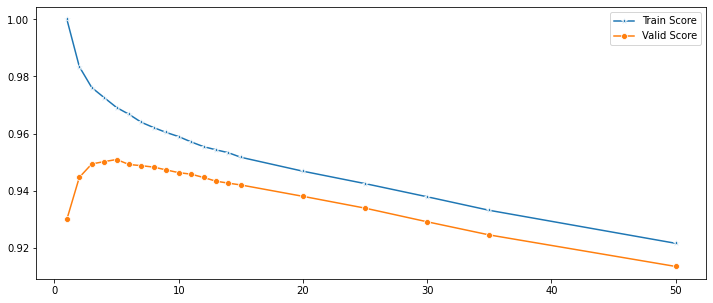

In [128]:
plt.figure(figsize=(12,5))
p = sns.lineplot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,50],train_scores,marker='*',label='Train Score')
p = sns.lineplot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,50],valid_scores,marker='o',label='Valid Score')

# **KNN Modelling**

In [129]:
knn = KNeighborsRegressor(5)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9534186637779305

# **Metrics**

In [130]:
from sklearn.metrics import  r2_score
y_pred = knn.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)
print("R2 Value: {}".format(rsquared))

R2 Value: 0.9534186637779305


# **Decision Tree**

In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.metrics import  r2_score

valid_scores = []
train_scores = []

for depth in [1,2,3,4,5,6,7,8,9,10,15,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = r2_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  train_scores.append(trainAccuracy)
  dt = DecisionTreeRegressor(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring = make_scorer(r2_score)) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  valid_scores.append(np.mean(valAccuracy))
  print("Depth : ",depth, " Train R2 : ",trainAccuracy, " Val Score : ", np.mean(valAccuracy))

Depth :  1  Train R2 :  0.3592696881051952  Val Score :  0.35676297296453263
Depth :  2  Train R2 :  0.6805117976302182  Val Score :  0.6791662640970615
Depth :  3  Train R2 :  0.8052110733669087  Val Score :  0.8039451631717693
Depth :  4  Train R2 :  0.8889332242782813  Val Score :  0.8836798055898252
Depth :  5  Train R2 :  0.9235203451855588  Val Score :  0.9159035918530034
Depth :  6  Train R2 :  0.9445795286637078  Val Score :  0.934786622003906
Depth :  7  Train R2 :  0.9601318677961193  Val Score :  0.9498415887321114
Depth :  8  Train R2 :  0.9730487095553456  Val Score :  0.9605774689605997
Depth :  9  Train R2 :  0.9829612304389422  Val Score :  0.9669874312822682
Depth :  10  Train R2 :  0.989791997935444  Val Score :  0.9703902349789265
Depth :  15  Train R2 :  0.9997753906002804  Val Score :  0.9724075244313444
Depth :  20  Train R2 :  0.9999982542432791  Val Score :  0.9727185569022818
Depth :  40  Train R2 :  0.9999984108284958  Val Score :  0.9725227856126754
Depth :  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



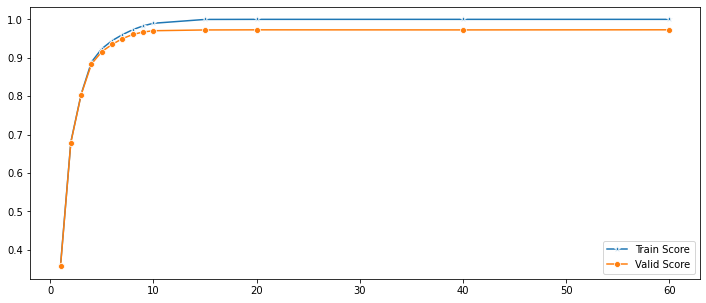

In [142]:
plt.figure(figsize=(12,5))
p = sns.lineplot([1,2,3,4,5,6,7,8,9,10,15,20,40,60],train_scores,marker='*',label='Train Score')
p = sns.lineplot([1,2,3,4,5,6,7,8,9,10,15,20,40,60],valid_scores,marker='o',label='Valid Score')

# **DT max depth = 20**

# Evaluation Metric

In [140]:
dt = DecisionTreeRegressor(max_depth=20)

# Fit dt to the training set
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

# Compute mse_dt
rsquared = r2_score(y_test,y_pred)
# Compute rmse_dt

from sklearn.metrics import  r2_score
# Print rmse_dt
print("Test set R2 of dt: {}".format(rsquared))

Test set R2 of dt: 0.972874119198624


# **Random Forest**